In [1]:
# Importamos las bibliotecas necesarias para la importación de datos
import pandas as pd
import os

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/getlimits.py:225: RuntimeWarning: invalid value encountered in exp2
  epsneg_f128 = exp2(ld(-113))


In [2]:
# Comprobamos en que directorio del sistema nos encontramos
os.getcwd()

'/Users/rafel/Documents/Python Data Science'

In [3]:
# Creamos la variable especificando la ruta a los datos que vamos a importar
peliculas = pd.read_csv("/Users/rafel/Documents/Python Data Science/99. Datos/RatingsPeliculas.csv")

In [4]:
# Comprobamos el número de filas
len(peliculas)

559

In [5]:
# Comprobamos la estructura imprimiendo las 5 primeras filas
peliculas.head()

,Pelicula,Genero,Ratings de Rotten Tomatoes %,Ratings de la Audience %,Presupuesto (millones USD),Lanzamiento
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [6]:
# Imprimimos el nombre de todas las columnas
peliculas.columns

Index(['Pelicula', 'Genero', 'Ratings de Rotten Tomatoes %',
       'Ratings de la Audience %', 'Presupuesto (millones USD)',
       'Lanzamiento'],
      dtype='object')

In [8]:
# Renombramos las columnas
peliculas.columns = ["Pelicula", "Genero", "RatingsCriticos", "RatingsAudiencia", \
                     "PresupuestoMillones", "Año"]
peliculas.head()

,Pelicula,Genero,RatingsCriticos,RatingsAudiencia,PresupuestoMillones,Año
0,(500) Days of Summer,Comedia,87,81,8,2009
1,"10,000 B.C.",Aventura,9,44,105,2008
2,12 Rounds,Accion,30,52,20,2009
3,127 Hours,Aventura,93,84,18,2010
4,17 Again,Comedia,55,70,20,2009


In [9]:
# Información general acerca del DataFrame, donde podemos comprobar el tipo de cada columna
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Pelicula             559 non-null    object
 1   Genero               559 non-null    object
 2   RatingsCriticos      559 non-null    int64 
 3   RatingsAudiencia     559 non-null    int64 
 4   PresupuestoMillones  559 non-null    int64 
 5   Año                  559 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [10]:
# Podemos comprobar que la columna "Año" no la queremos tratar de forma numérica, 
# y lo podemos ver de forma más clara en el siguiente ejemplo
peliculas.describe()

,RatingsCriticos,RatingsAudiencia,PresupuestoMillones,Año
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [11]:
# Definimos las columnas deseadas como "category"
peliculas.Pelicula = peliculas.Pelicula.astype("category")
peliculas.Genero = peliculas.Genero.astype("category")
peliculas.Año = peliculas.Año.astype("category")

In [12]:
peliculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Pelicula             559 non-null    category
 1   Genero               559 non-null    category
 2   RatingsCriticos      559 non-null    int64   
 3   RatingsAudiencia     559 non-null    int64   
 4   PresupuestoMillones  559 non-null    int64   
 5   Año                  559 non-null    category
dtypes: category(3), int64(3)
memory usage: 36.5 KB


In [13]:
# Al haber cambiado el tipo a categoria esto nos permite utilizar la siguiente función
peliculas.Genero.cat.categories

Index(['Accion', 'Aventura', 'Comedia', 'Drama', 'Romance', 'Suspenso',
       'Terror'],
      dtype='object')

In [14]:
# También veremos que la columna Años ya no aparece
peliculas.describe()

,RatingsCriticos,RatingsAudiencia,PresupuestoMillones
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


---

In [15]:
# Importamos las bibliotecas para crear las visualizaciones
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

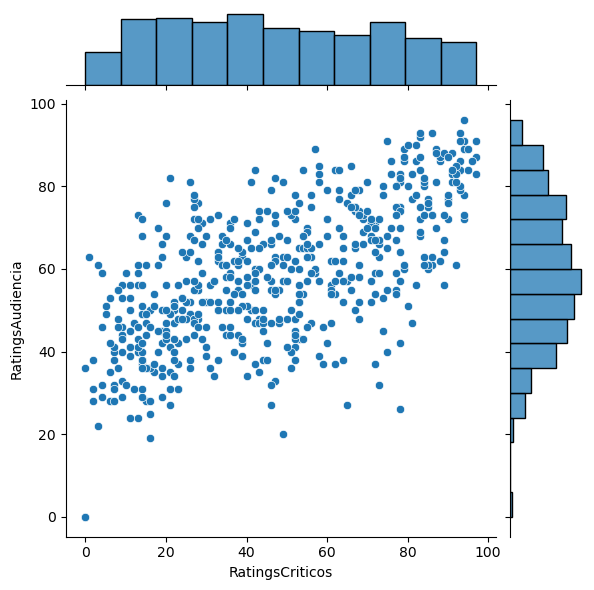

In [16]:
# jointplots
j = sns.jointplot(data = peliculas, x = "RatingsCriticos", y = "RatingsAudiencia")

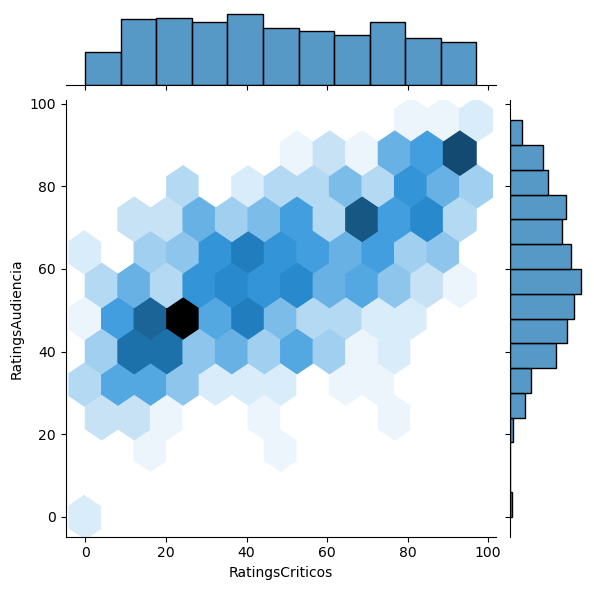

In [17]:
# Diagrama 1
j = sns.jointplot(data = peliculas, x = "RatingsCriticos", y = "RatingsAudiencia", kind = "hex")

---

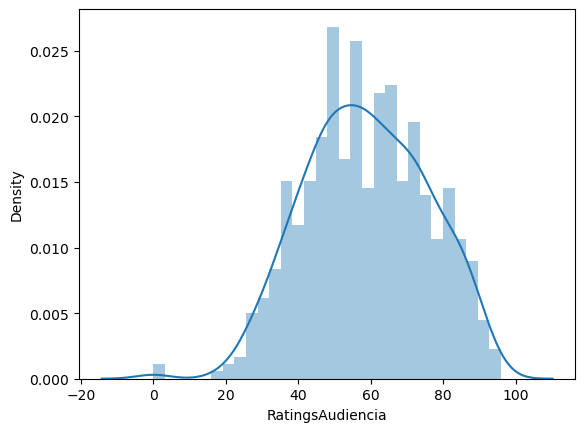

In [20]:
# Histogramas
# Método usado anteriormente
m1 = sns.distplot(peliculas.RatingsAudiencia, bins = 30)

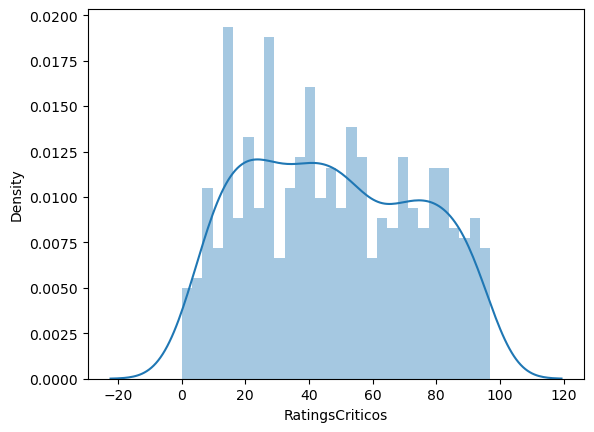

In [21]:
m2 = sns.distplot(peliculas.RatingsCriticos, bins = 30)

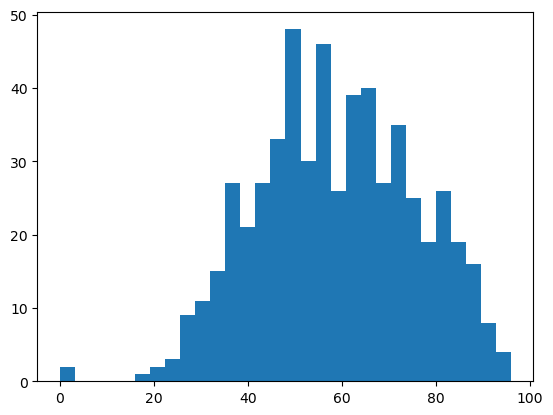

In [22]:
# Diagrama 2
n1 = plt.hist(peliculas.RatingsAudiencia, bins = 30)

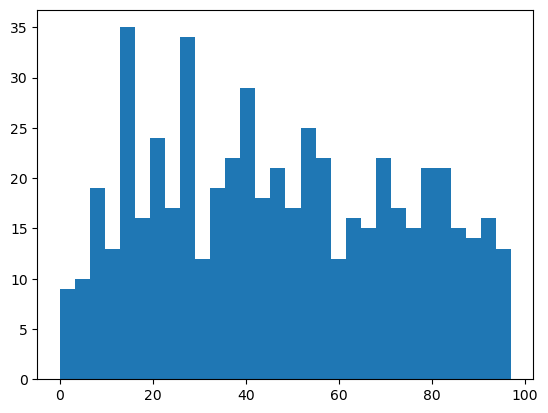

In [23]:
# Diagrama 3
n2 = plt.hist(peliculas.RatingsCriticos, bins = 30)

Con los gráficos anteriores podemos comprobar como la puntuación de la audiencia se 
distribuye de forma uniforme, al ser más natural dada por las emociones generadas.
Mientras que la puntuación de la crítica debe seguir unos criterios de evaluación,
lo que conlleva una pérdida de naturalidad y una mayor distribución.

---

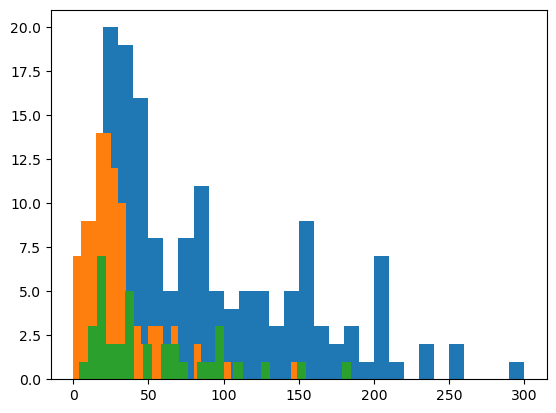

In [32]:
# Histogramas Apilados
plt.hist(peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, bins = 30)
plt.hist(peliculas[peliculas.Genero == "Drama"].PresupuestoMillones, bins = 30)
plt.hist(peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones, bins = 30)
plt.show()

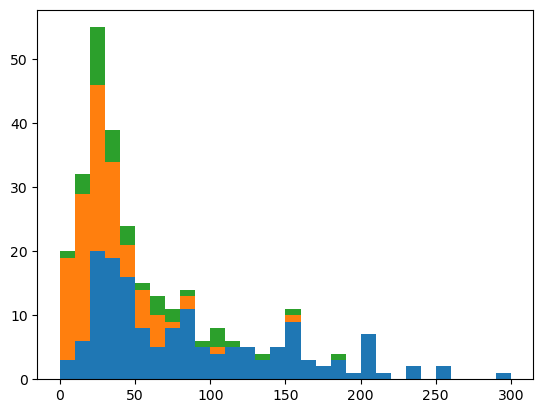

In [34]:
# Creación de lista para apilar las barras
plt.hist([peliculas[peliculas.Genero == "Accion"].PresupuestoMillones, \
          peliculas[peliculas.Genero == "Drama"].PresupuestoMillones, \
          peliculas[peliculas.Genero == "Suspenso"].PresupuestoMillones], \
         bins = 30, stacked = True)
plt.show()

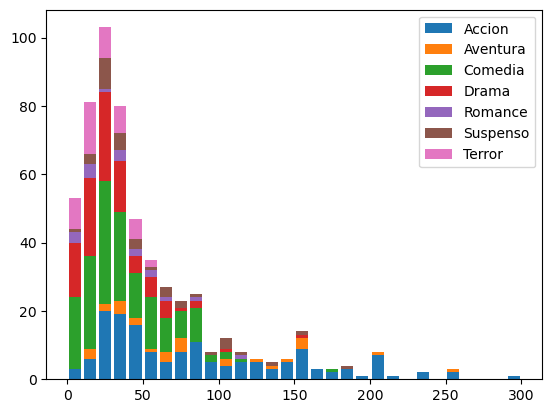

In [40]:
# Diagrama 4
# Iterar los géneros de forma automática
lista1 = list()
mis_etiquetas = list()

for gen in peliculas.Genero.cat.categories:
    lista1.append(peliculas[peliculas.Genero == gen].PresupuestoMillones)
    mis_etiquetas.append(gen)
    
h = plt.hist(lista1, bins = 30, stacked = True, rwidth = 0.8, label = mis_etiquetas)
plt.legend()
plt.show()

---

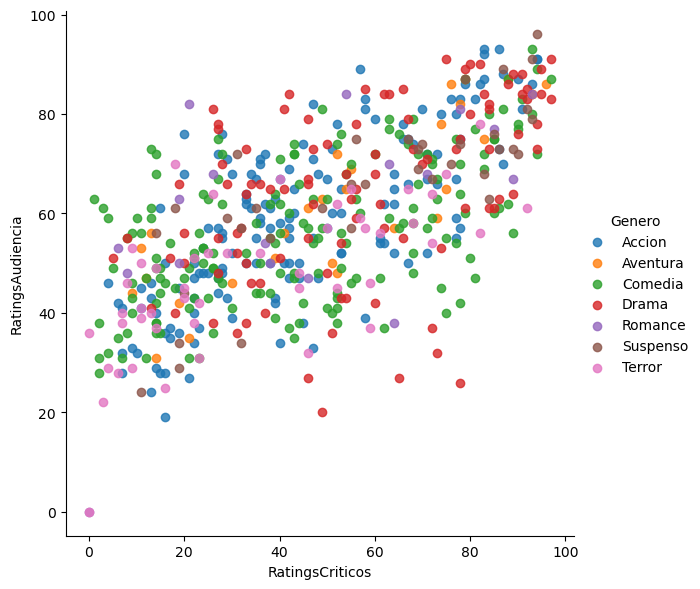

In [42]:
# Gráfico KDE
vis1 = sns.lmplot(data = peliculas, x = "RatingsCriticos", y = "RatingsAudiencia", \
                 fit_reg = False, hue = "Genero", height = 6, aspect = 1)

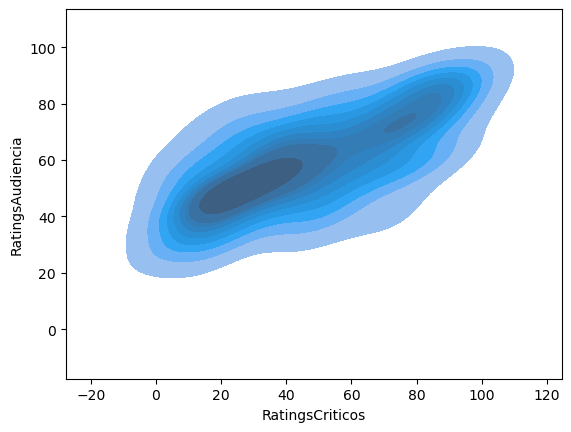

In [47]:
k1 = sns.kdeplot(data = peliculas, x = "RatingsCriticos", y = "RatingsAudiencia", \
                 shade = True)